In [16]:
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv('approved-permits.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'approved-permits.csv'

In [ ]:
df.isnull().sum()

permitnumber              0
worktype               4541
permittypedescr           0
description            4541
comments                207
applicant              8824
declared_valuation        0
total_fees                0
issued_date               0
expiration_date       25590
status                    0
owner                 14593
occupancytype          1929
sq_feet                   0
address                6957
city                    185
state                     0
zip                     418
property_id           10625
parcel_id             14593
gpsy                  14463
gpsx                  14463
geom_point_2249       14463
geom_point_4326       14463
dtype: int64

/var/folders/ws/_jcjzpkn43g4jn3yjvq6bcyh0000gn/T/ipykernel_4050/2636061593.py:5: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


[2006 2007 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020
 2021 2022 2023 2024]
[2109.0 2132.0 2129.0 2118.0 2135.0 2134.0 2114.0 2119.0 2130.0 2128.0
 2124.0 2108.0 2136.0 2121.0 2127.0 2210.0 2111.0 2199.0 2125.0 2122.0
 2215.0 2116.0 2110.0 2113.0 2115.0 2120.0 2126.0 2131.0 2467.0 2163.0
 1803.0 2201.0 2117.0 2151.0 2137.0 2203.0 '2127' '2135' '2131' '2110'
 '2124' '2215' '2210' '2118' '2109' '2111' '2108' '2116' '2115' '2129'
 '2128' '2130' '2114' '2113' '2120' '2199' '2122' '2467' '2119' '2136'
 '2125' '2132' '2134' '2126' '2121' '2163' '2103' '2201' '2133'
 '02126-1616' '2203' '8091' '2117' '1803' 2133.0 2222.0 2446.0 2103.0
 2123.0 '2468' '2137' 2158.0 8091.0 '8' 2104.0]
['02109' '02132' '02129' '02118' '02135' '02134' '02114' '02119' '02130'
 '02128' '02124' '02108' '02136' '02121' '02127' '02210' '02111' '02199'
 '02125' '02122' '02215' '02116' '02110' '02113' '02115' '02120' '02126'
 '02131' '02467' '02163' '01803' '02201' '02117' '02151' '02137' '02203'
 '02103

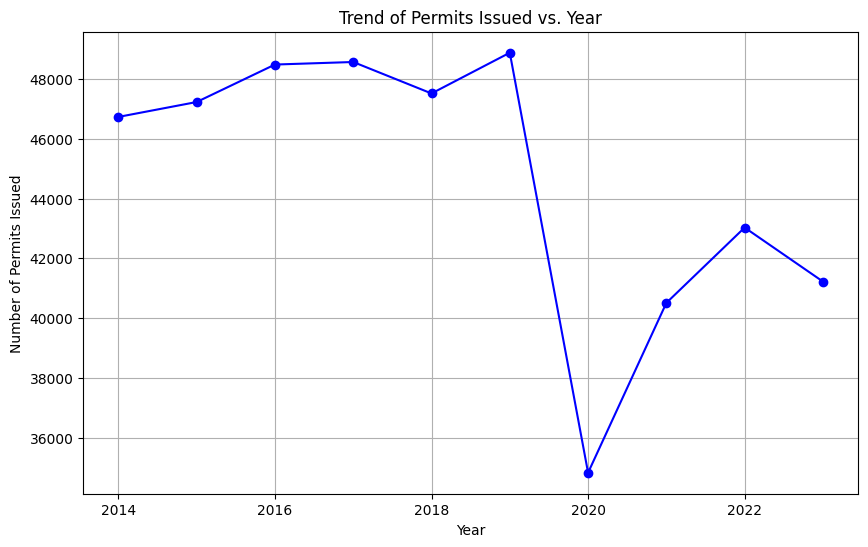

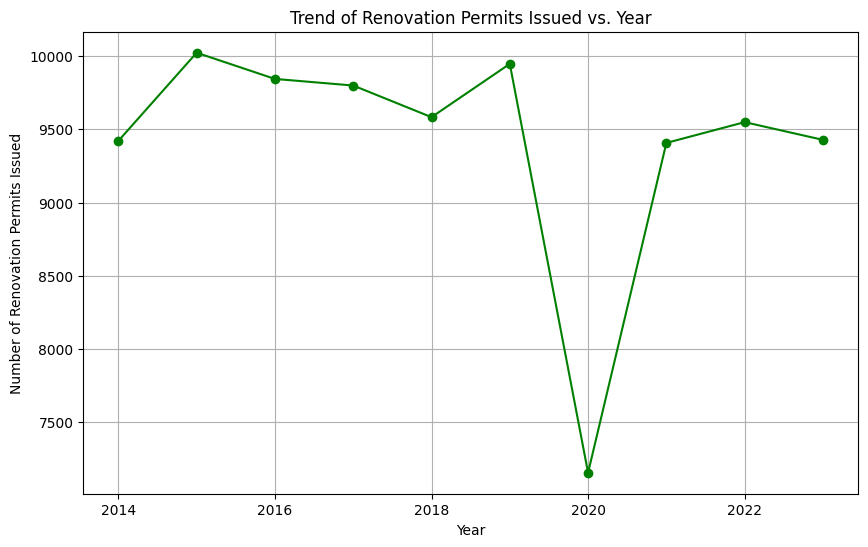

In [27]:

#Load the data
import pandas as pd

file_path = 'approved_building_permits.csv'
df = pd.read_csv(file_path)


# <font size="3"><strong>Data Cleaning and Transformation

# In[2]:


#Data Cleaning and Transformation

#Convert `issued_date` to datetime format
df['issued_date'] = pd.to_datetime(df['issued_date'])

#Extract year from `issued_date` for easier analysis by year
df['year'] = df['issued_date'].dt.year

#Convert `declared_valuation` to a numeric format
df['declared_valuation'] = df['declared_valuation'].replace('[\$,]', '', regex=True)  # Remove '$' and ','
df['declared_valuation'] = df['declared_valuation'].replace('\(', '-', regex=True)    # Replace '(' with '-'
df['declared_valuation'] = df['declared_valuation'].replace('\)', '', regex=True)      # Remove ')'
df['declared_valuation'] = df['declared_valuation'].astype(float) 

#Drop rows where 'zip', 'worktype', or 'issued_date' is missing (for convenience)
df.dropna(subset=['zip', 'worktype', 'issued_date'], inplace=True)

df.head()


# In[6]:


#Check the unqiue values of 'year' column (For future visualization)
unique_years = df['year'].unique()
unique_years.sort()
print(unique_years)


# In[10]:


#Check the unique values of 'zip' column
unique_zips = df['zip'].unique()
print(unique_zips)


# In[3]:


#Clean the 'zip' column

#Step 0: Transform 'zip' column to string format, ensuring it's 5 digits
df['zip'] = df['zip'].astype(str).apply(lambda x: x.split('.')[0])
df['zip'] = df['zip'].astype(str).apply(lambda x: x.split('-')[0]) #only for '02126-1616'
df['zip'] = df['zip'].astype(str).str.zfill(5)

print(df['zip'].unique())


# In[4]:


#Reference to which zip belongs to which city
neighborhood_zip_codes = {
    "Allston/Brighton": ["02134", "02135", "02163"],
    "Back Bay/Beacon Hill": ["02108", "02116", "02117","02123", "02133", "02199", "02216", "02217", "02295"],
    "Central Boston": ["02101", "02102", "02103", "02104", "02105", "02106", "02107", "02109", "02110", "02111", "02112", "02113", "02114", "02196", "02201", "02202", "02203", "02204", "02205", "02206", "02207", "02208", "02209", "02211", "02212", "02222", "02293"],
    "Charlestown": ["02129"],
    "Chestnut Hill": ["02467"],
    "Dedham": ["02026"],
    "Dorchester": ["02122", "02124", "02125"],
    "East Boston": ["02128", "02228"],
    "Fenway/Kenmore": ["02115", "02215"],
    "Hyde Park": ["02136"],
    "Jamaica Plain": ["02130"],
    "Mattapan": ["02126"],
    "Newton": ["02458"],
    "Readville": ["02137"],
    "Roslindale": ["02131"],
    "Roxbury": ["02119", "02121"],
    "Roxbury Crossing": ["02120"],
    "South Boston": ["02127", "02210"],
    "South End": ["02118"],
    "West Roxbury": ["02132"]
}

#Step 1: Match zip codes and assign neighborhood names
def assign_neighborhood(zip_code):
    for neighborhood, zip_codes in neighborhood_zip_codes.items():
        if zip_code in zip_codes:
            return neighborhood
    return None

df['neighborhood'] = df['zip'].apply(assign_neighborhood)
#Drop rows with neighborhood missing
df.dropna(subset=['neighborhood'], inplace=True)

print(df[['zip', 'neighborhood']].head())


# In[20]:


#Check the unique values for worktype
unique_worktypes = df['worktype'].unique()
print(unique_worktypes)


# In[5]:


#Clean the 'worktype' column

#Step 1: Convert all to uppercase
df['worktype'] = df['worktype'].str.upper()

print(df['worktype'].unique())


# In[6]:


#Based on the description, consolidate into broader categories for simplicity and clearer analysis
worktype_categories = {
    'INTEXT': 'Renovations', 
    'COB': 'Municipal', 
    'OTHER': 'Other', 
    'EXTREN': 'Renovations', 
    'INTREN': 'Renovations', 
    'VIOL': 'Compliance', 
    'ADDITION': 'Additions', 
    'EXTDEM': 'Renovations', 
    'FA': 'Safety Systems', 
    'SPRINK': 'Safety Systems', 
    'SIGNES': 'Signage', 
    'CELL': 'Infrastructure', 
    'NEWCON': 'New Construction', 
    'ERECT': 'New Construction', 
    'SPRNK9': 'Safety Systems', 
    'SITE': 'Site Work', 
    'ROOF': 'Roofing', 
    'FSTTRK': 'Other',
    'PLUMBING': 'Plumbing', 
    'CHGOCC': 'Compliance',
    'SOL': 'Green Energy', 
    'SPCEVE': 'Temporary Structures', 
    'INTDEM': 'Demolition', 
    'GENERAL': 'Other', 
    'CANP': 'Outdoor Structures', 
    'AWNING': 'Outdoor Structures',
    'TCOO': 'Compliance', 
    'FENCE2': 'Fencing', 
    'INSUL': 'Renovations', 
    'GEN': 'Infrastructure', 
    'GARAGE': 'New Construction', 
    'SD': 'Site Work', 
    'LVOLT': 'Electrical', 
    'SIDE': 'Renovations', 
    'SIGNS': 'Signage',
    'RESPAR': 'Infrastructure', 
    'ELECTRICAL': 'Electrical', 
    'DRIVE': 'Site Work', 
    'NROCC': 'Compliance', 
    'MAINT': 'Maintenance', 
    'TEMTRL': 'Temporary Structures', 
    'INDBLR': 'Infrastructure', 
    'SPFT': 'Other',
    'RNWSIG': 'Signage', 
    'COMPAR': 'Infrastructure', 
    'AWNRNW': 'Outdoor Structures', 
    'AWNRET': 'Outdoor Structures', 
    'CANPRN': 'Outdoor Structures', 
    'RAZE': 'Demolition', 
    'TMPSER': 'Temporary Structures', 
    'HOLVEN': 'Temporary Structures',
    'OSEAT': 'Outdoor Structures', 
    'FENCE': 'Fencing', 
    'TMPUSOC': 'Compliance', 
    'FLAM': 'Safety Systems', 
    'CONVRT': 'Other', 
    'REPAIR': 'Maintenance', 
    'SRVCHG': 'Electrical', 
    'TVTRK': 'Temporary Structures',
    'BFCHMDECMA': 'Renovations', 
    'SERVICE': 'Maintenance', 
    'MAIN': 'Maintenance', 
    'TRENCH': 'Site Work', 
    'GAS': 'Plumbing', 
    'NEW': 'New Construction', 
    'INDFUR': 'Infrastructure', 
    'BFCHMTENT': 'Temporary Structures',
    'BFCHMFLOOR': 'Renovations', 
    'BFCHMINFIN': 'Renovations', 
    'BFCHMTEMPE': 'Temporary Structures', 
    'FENCING': 'Fencing', 
    'SPECEVENT': 'Temporary Structures', 
    'BFCHMMATTR': 'Renovations',
    'DUMPSTERS': 'Site Work', 
    'STAGING': 'Site Work', 
    'SPEEVENTS': 'Temporary Structures'
}
#Step 2: Apply the mapping to consolidate work types
df['worktype_category'] = df['worktype'].map(worktype_categories).fillna('Other')

print(df['worktype_category'].unique())


# <font size="3"><strong>Data Aggregation & Visualization

# In[7]:


import matplotlib.pyplot as plotty


# <font size="3">1. The trend of the number of permits issued each year

# In[18]:


# Count the number of permits issued each year
filtered_df = df[(df['year'] >= 2014) & (df['year'] <= 2023)]
permits_by_year = filtered_df.groupby('year').size()

#Plot
plotty.figure(figsize=(10, 6))
permits_by_year.plot(kind='line', marker='o', linestyle='-', color='blue')
plotty.title('Trend of Permits Issued vs. Year')
plotty.xlabel('Year')
plotty.ylabel('Number of Permits Issued')
plotty.grid(True)
plotty.show()

renovation_df = filtered_df[filtered_df['worktype_category'] == 'Renovations']

# Count the number of renovation permits issued each year
renovation_permits_by_year = renovation_df.groupby('year').size()

# Plot
plotty.figure(figsize=(10, 6))
renovation_permits_by_year.plot(kind='line', marker='o', linestyle='-', color='green')
plotty.title('Trend of Renovation Permits Issued vs. Year')
plotty.xlabel('Year')
plotty.ylabel('Number of Renovation Permits Issued')
plotty.grid(True)
plotty.show()

/var/folders/ws/_jcjzpkn43g4jn3yjvq6bcyh0000gn/T/ipykernel_4050/3577759591.py:5: DtypeWarning: Columns (15,46,53,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f)
/var/folders/ws/_jcjzpkn43g4jn3yjvq6bcyh0000gn/T/ipykernel_4050/3577759591.py:5: DtypeWarning: Columns (60,63) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f)
/var/folders/ws/_jcjzpkn43g4jn3yjvq6bcyh0000gn/T/ipykernel_4050/3577759591.py:5: DtypeWarning: Columns (60,63) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f)
/var/folders/ws/_jcjzpkn43g4jn3yjvq6bcyh0000gn/T/ipykernel_4050/3577759591.py:5: DtypeWarning: Columns (15,60,63) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f)
/var/folders/ws/_jcjzpkn43g4jn3yjvq6bcyh0000gn/T/ipykernel_4050/3577759591.py:5: DtypeWarning: Columns (15,60) have mixed types. Specify dtype option on import or 

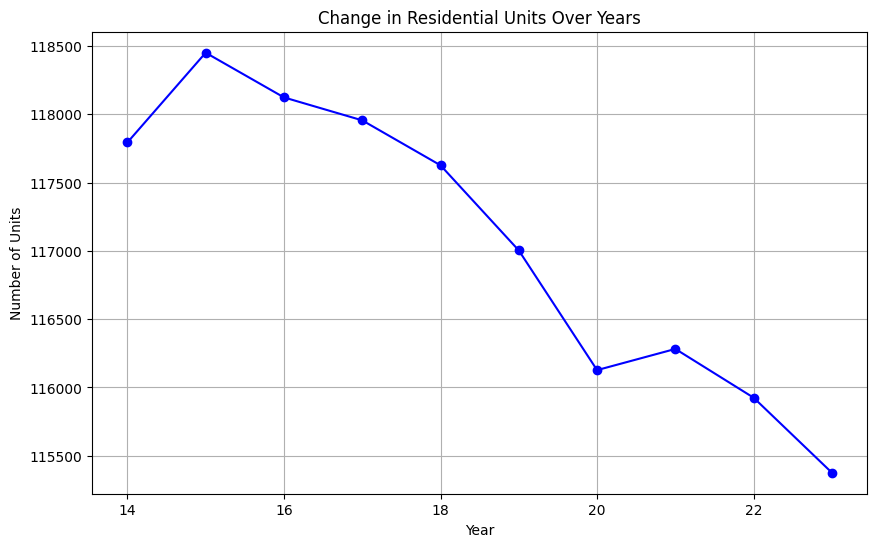

In [28]:


# Creating the plot
plt.figure(figsize=(10, 6))  
plt.plot(years, values, marker='o', linestyle='-', color='b') 

# Adding title and labels
plt.title('Change in Residential Units Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Units')


plt.grid(True)

# Display the plot
plt.show()

/var/folders/ws/_jcjzpkn43g4jn3yjvq6bcyh0000gn/T/ipykernel_4050/2119021852.py:6: DtypeWarning: Columns (15,46,53,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f)
/var/folders/ws/_jcjzpkn43g4jn3yjvq6bcyh0000gn/T/ipykernel_4050/2119021852.py:6: DtypeWarning: Columns (60,63) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f)
/var/folders/ws/_jcjzpkn43g4jn3yjvq6bcyh0000gn/T/ipykernel_4050/2119021852.py:6: DtypeWarning: Columns (60,63) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f)
/var/folders/ws/_jcjzpkn43g4jn3yjvq6bcyh0000gn/T/ipykernel_4050/2119021852.py:6: DtypeWarning: Columns (15,60,63) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f)
/var/folders/ws/_jcjzpkn43g4jn3yjvq6bcyh0000gn/T/ipykernel_4050/2119021852.py:6: DtypeWarning: Columns (15,60) have mixed types. Specify dtype option on import or 

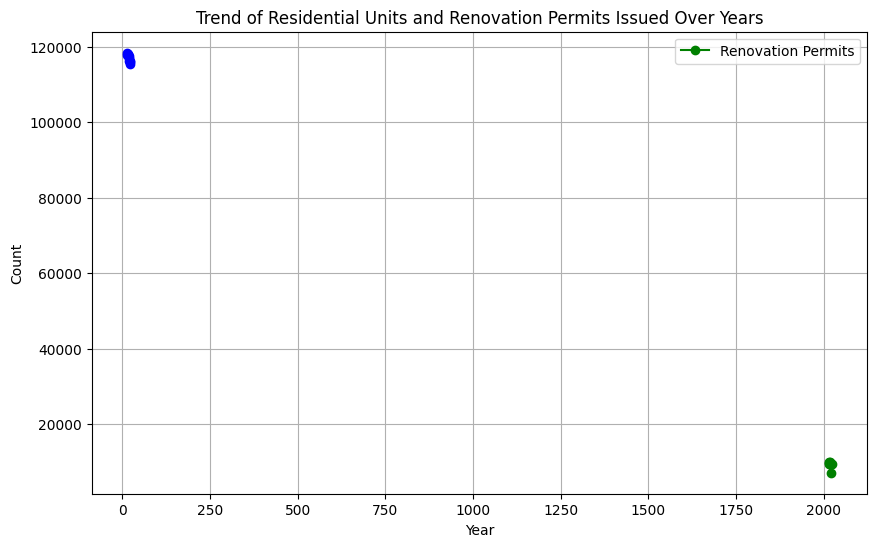

In [30]:
# Plotting both lines on the same graph
vals = {}

for i in range(14, 24):
    f = f'FY{i}.csv'
    df = pd.read_csv(f)
    count = 0

    lu_counts = df['LU'].value_counts()

    for j in range(1, 5):
        if f'R{j}' in lu_counts:
            count += j * lu_counts[f'R{j}']
    
    vals[i] = count

# Sorting the dictionary by year (key) and unpacking into lists
years, values = zip(*sorted(vals.items()))

plt.figure(figsize=(10, 6))

# Plotting the trend of renovation permits issued over years
renovation_permits_by_year.plot(kind='line', marker='o', linestyle='-', color='green', label='Renovation Permits')
plt.plot(years, values, marker='o', linestyle='-', color='b') 

# Adding title and labels
plt.title('Trend of Residential Units and Renovation Permits Issued Over Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)

# Adding legend
plt.legend()

# Displaying the plot
plt.show()


In [1]:
#!/usr/bin/env python
# coding: utf-8

# <font size="5"><strong>Mid-Semester Report - Remodeling Group A (Question 3)

# With the building permits data, we'll answer the question: **Where are housing remodels and renovation happening?**<br>
# The data will be visualized by `year`, `zip`, and `worktypes` based on the data following the steps:<br><br>
# **Extract Relevent Data**: focus on extracting data related to `issued_date`, `zip`, `worktype`. For `issued_date`, we'll extract year from its Format: "%Y-%m-%d %H:%M:%S". We'll also categorize the `worktype` to group similar types of renovations and remodels together.<br><br>
# **Visualization Plan**: <br>
# 1. A time series showing the number of permits issued for housing remodels and renovations over the years<br>
# 2. Breakdowns by zip to see geographical trends<br>
# 3. Breakdowns by worktype to understand what kinds of remodels and rennovations are most common
# 

# <font size="3"><strong>Load the Data

# In[1]:


#Load the data
import pandas as pd

file_path = 'approved_building_permits.csv'
df = pd.read_csv(file_path)


# <font size="3"><strong>Data Cleaning and Transformation

# In[2]:


#Data Cleaning and Transformation

#Convert `issued_date` to datetime format
df['issued_date'] = pd.to_datetime(df['issued_date'])

#Extract year from `issued_date` for easier analysis by year
df['year'] = df['issued_date'].dt.year

#Convert `declared_valuation` to a numeric format
df['declared_valuation'] = df['declared_valuation'].replace('[\$,]', '', regex=True)  # Remove '$' and ','
df['declared_valuation'] = df['declared_valuation'].replace('\(', '-', regex=True)    # Replace '(' with '-'
df['declared_valuation'] = df['declared_valuation'].replace('\)', '', regex=True)      # Remove ')'
df['declared_valuation'] = df['declared_valuation'].astype(float) 

#Drop rows where 'zip', 'worktype', or 'issued_date' is missing (for convenience)
df.dropna(subset=['zip', 'worktype', 'issued_date'], inplace=True)

df.head()


# In[6]:


#Check the unqiue values of 'year' column (For future visualization)
unique_years = df['year'].unique()
unique_years.sort()
print(unique_years)


# In[10]:


#Check the unique values of 'zip' column
unique_zips = df['zip'].unique()
print(unique_zips)


# In[3]:


#Clean the 'zip' column

#Step 0: Transform 'zip' column to string format, ensuring it's 5 digits
df['zip'] = df['zip'].astype(str).apply(lambda x: x.split('.')[0])
df['zip'] = df['zip'].astype(str).apply(lambda x: x.split('-')[0]) #only for '02126-1616'
df['zip'] = df['zip'].astype(str).str.zfill(5)

print(df['zip'].unique())


# In[4]:


#Reference to which zip belongs to which city
neighborhood_zip_codes = {
    "Allston/Brighton": ["02134", "02135", "02163"],
    "Back Bay/Beacon Hill": ["02108", "02116", "02117","02123", "02133", "02199", "02216", "02217", "02295"],
    "Central Boston": ["02101", "02102", "02103", "02104", "02105", "02106", "02107", "02109", "02110", "02111", "02112", "02113", "02114", "02196", "02201", "02202", "02203", "02204", "02205", "02206", "02207", "02208", "02209", "02211", "02212", "02222", "02293"],
    "Charlestown": ["02129"],
    "Chestnut Hill": ["02467"],
    "Dedham": ["02026"],
    "Dorchester": ["02122", "02124", "02125"],
    "East Boston": ["02128", "02228"],
    "Fenway/Kenmore": ["02115", "02215"],
    "Hyde Park": ["02136"],
    "Jamaica Plain": ["02130"],
    "Mattapan": ["02126"],
    "Newton": ["02458"],
    "Readville": ["02137"],
    "Roslindale": ["02131"],
    "Roxbury": ["02119", "02121"],
    "Roxbury Crossing": ["02120"],
    "South Boston": ["02127", "02210"],
    "South End": ["02118"],
    "West Roxbury": ["02132"]
}

#Step 1: Match zip codes and assign neighborhood names
def assign_neighborhood(zip_code):
    for neighborhood, zip_codes in neighborhood_zip_codes.items():
        if zip_code in zip_codes:
            return neighborhood
    return None

df['neighborhood'] = df['zip'].apply(assign_neighborhood)
#Drop rows with neighborhood missing
df.dropna(subset=['neighborhood'], inplace=True)

print(df[['zip', 'neighborhood']].head())


# In[20]:


#Check the unique values for worktype
unique_worktypes = df['worktype'].unique()
print(unique_worktypes)


# In[5]:


#Clean the 'worktype' column

#Step 1: Convert all to uppercase
df['worktype'] = df['worktype'].str.upper()

print(df['worktype'].unique())


# In[6]:


#Based on the description, consolidate into broader categories for simplicity and clearer analysis
worktype_categories = {
    'INTEXT': 'Renovations', 
    'COB': 'Municipal', 
    'OTHER': 'Other', 
    'EXTREN': 'Renovations', 
    'INTREN': 'Renovations', 
    'VIOL': 'Compliance', 
    'ADDITION': 'Additions', 
    'EXTDEM': 'Renovations', 
    'FA': 'Safety Systems', 
    'SPRINK': 'Safety Systems', 
    'SIGNES': 'Signage', 
    'CELL': 'Infrastructure', 
    'NEWCON': 'New Construction', 
    'ERECT': 'New Construction', 
    'SPRNK9': 'Safety Systems', 
    'SITE': 'Site Work', 
    'ROOF': 'Roofing', 
    'FSTTRK': 'Other',
    'PLUMBING': 'Plumbing', 
    'CHGOCC': 'Compliance',
    'SOL': 'Green Energy', 
    'SPCEVE': 'Temporary Structures', 
    'INTDEM': 'Demolition', 
    'GENERAL': 'Other', 
    'CANP': 'Outdoor Structures', 
    'AWNING': 'Outdoor Structures',
    'TCOO': 'Compliance', 
    'FENCE2': 'Fencing', 
    'INSUL': 'Renovations', 
    'GEN': 'Infrastructure', 
    'GARAGE': 'New Construction', 
    'SD': 'Site Work', 
    'LVOLT': 'Electrical', 
    'SIDE': 'Renovations', 
    'SIGNS': 'Signage',
    'RESPAR': 'Infrastructure', 
    'ELECTRICAL': 'Electrical', 
    'DRIVE': 'Site Work', 
    'NROCC': 'Compliance', 
    'MAINT': 'Maintenance', 
    'TEMTRL': 'Temporary Structures', 
    'INDBLR': 'Infrastructure', 
    'SPFT': 'Other',
    'RNWSIG': 'Signage', 
    'COMPAR': 'Infrastructure', 
    'AWNRNW': 'Outdoor Structures', 
    'AWNRET': 'Outdoor Structures', 
    'CANPRN': 'Outdoor Structures', 
    'RAZE': 'Demolition', 
    'TMPSER': 'Temporary Structures', 
    'HOLVEN': 'Temporary Structures',
    'OSEAT': 'Outdoor Structures', 
    'FENCE': 'Fencing', 
    'TMPUSOC': 'Compliance', 
    'FLAM': 'Safety Systems', 
    'CONVRT': 'Other', 
    'REPAIR': 'Maintenance', 
    'SRVCHG': 'Electrical', 
    'TVTRK': 'Temporary Structures',
    'BFCHMDECMA': 'Renovations', 
    'SERVICE': 'Maintenance', 
    'MAIN': 'Maintenance', 
    'TRENCH': 'Site Work', 
    'GAS': 'Plumbing', 
    'NEW': 'New Construction', 
    'INDFUR': 'Infrastructure', 
    'BFCHMTENT': 'Temporary Structures',
    'BFCHMFLOOR': 'Renovations', 
    'BFCHMINFIN': 'Renovations', 
    'BFCHMTEMPE': 'Temporary Structures', 
    'FENCING': 'Fencing', 
    'SPECEVENT': 'Temporary Structures', 
    'BFCHMMATTR': 'Renovations',
    'DUMPSTERS': 'Site Work', 
    'STAGING': 'Site Work', 
    'SPEEVENTS': 'Temporary Structures'
}
#Step 2: Apply the mapping to consolidate work types
df['worktype_category'] = df['worktype'].map(worktype_categories).fillna('Other')

print(df['worktype_category'].unique())


# <font size="3"><strong>Data Aggregation & Visualization

# In[7]:


import matplotlib.pyplot as plt


# <font size="3">1. The trend of the number of permits issued each year

# In[18]:


# Count the number of permits issued each year
filtered_df = df[(df['year'] >= 2010) & (df['year'] <= 2023)]
permits_by_year = filtered_df.groupby('year').size()

#Plot
plt.figure(figsize=(10, 6))
permits_by_year.plot(kind='line', marker='o', linestyle='-', color='blue')
plt.title('Trend of Permits Issued vs. Year')
plt.xlabel('Year')
plt.ylabel('Number of Permits Issued')
plt.grid(True)
plt.show()


# <font size="3">2. How the number of permits changes over years for each neighborhood

# In[19]:


#Count the number of permits issued each year for each neighborhood
permits_by_year_neighborhood = filtered_df.groupby(['year', 'neighborhood']).size().unstack(fill_value=0)

#Plot
plt.figure(figsize=(14, 8))
for neighborhood in permits_by_year_neighborhood.columns:
    plt.plot(permits_by_year_neighborhood.index, permits_by_year_neighborhood[neighborhood], marker='o', label=neighborhood)

plt.title('Numer of Permits Issued by Year and Neighborhood')
plt.xlabel('Year')
plt.ylabel('Number of Permits Issued')
plt.legend(title='Neighborhood', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


# <font size="3">3. How the number of permits for each worktype category changes over the years

# In[20]:


#Count the number of permits issued each year for each worktype category
permits_by_year_worktype = filtered_df.groupby(['year', 'worktype_category']).size().unstack(fill_value=0)

#Plot
plt.figure(figsize=(14, 8))
for worktype_category in permits_by_year_worktype.columns:
    plt.plot(permits_by_year_worktype.index, permits_by_year_worktype[worktype_category], marker='o', linestyle='-', label=worktype_category)
    
plt.title('Number of Permits Issued by Year and Worktype Category')
plt.xlabel('Year')
plt.ylabel('Number of permits Issued')
plt.legend(title='Worktype Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


# In[21]:


#Plot (Exclude Plumbing, Renovations, Electrical, for a clearer visualzation)
plt.figure(figsize=(14, 8))
for worktype in permits_by_year_worktype.columns:
    if worktype != 'Plumbing' and worktype != 'Renovations' and worktype != 'Electrical':
        plt.plot(permits_by_year_worktype.index, permits_by_year_worktype[worktype], marker='o', linestyle='-', label=worktype)
    
plt.title('Number of Permits Issued by Year and Worktype Category (Exclude Plumbing, Renovations, Electrical)')
plt.xlabel('Year')
plt.ylabel('Number of permits Issued')
plt.legend(title='Worktype Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


# <font size="3">4. Distribution of permits by worktype categories for each year and each neighborhood

# In[40]:


years = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
 2021, 2022, 2023]
neighborhoods = ["Allston/Brighton", "Back Bay/Beacon Hill", "Central Boston", "Charlestown", "Chestnut Hill",
                 "Dedham", "Dorchester", "East Boston", "Fenway/Kenmore", "Hyde Park",
                 "Jamaica Plain", "Mattapan", "Newton", "Readville", "Roslindale", "Roxbury",
                 "Roxbury Crossing", "South Boston", "South End", "West Roxbury"]

for y in years:
    df_selected_year = filtered_df[filtered_df['year'] == y]
    
    #List of unique neighborhoods
    unique_neighborhoods = df_selected_year['neighborhood'].unique()
    
    #Number of unique neighborhoods
    n_neighborhoods = len(unique_neighborhoods)
    
    #Set up matplotlib figure
    fig, axes = plt.subplots(nrows=n_neighborhoods, ncols=1, figsize=(14, 4*n_neighborhoods))
    
    if n_neighborhoods == 1:
        axes = [axes]
    
    #Loop through each neighborhood and plot a histogram for it
    for i, neighborhood in enumerate(unique_neighborhoods):
        #Filter data
        neighborhood_data = df_selected_year[df_selected_year['neighborhood'] == neighborhood]
        #Count the permits by worktype category
        permit_counts = neighborhood_data.groupby('worktype_category').size()
        
        #Plot the histogram
        axes[i].bar(permit_counts.index, permit_counts.values)
        axes[i].set_title(f'Permit Distribution by Worktype Category - {neighborhood} ({y})')
        axes[i].set_xlabel('Worktype Category')
        axes[i].set_ylabel('Number of Permits')
        axes[i].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()


# 5. For each neighborhood, the number of permits changes by year for each worktype category

# In[24]:


neighborhoods = ["Allston/Brighton", "Back Bay/Beacon Hill", "Central Boston", "Charlestown", "Chestnut Hill",
                 "Dedham", "Dorchester", "East Boston", "Fenway/Kenmore", "Hyde Park",
                 "Jamaica Plain", "Mattapan", "Newton", "Readville", "Roslindale", "Roxbury",
                 "Roxbury Crossing", "South Boston", "South End", "West Roxbury"]

permit_count_neighborhood_worktype = filtered_df.groupby(['neighborhood', 'worktype_category', 'year']).size()

for n in neighborhoods:
    neighborhood_df = filtered_df[filtered_df['neighborhood'] == n]
    neighborhood_worktype_categories = neighborhood_df['worktype_category'].unique()
    plt.figure(figsize=(14, 8))
    #print(f'For {n}:')
    
    for w in neighborhood_worktype_categories:
        yearly_counts = permit_count_neighborhood_worktype.loc[n].loc[w].reindex(range(2010, 2024), fill_value=0)
        #print(f'{w}: {dict(yearly_counts)}')
        plt.plot(yearly_counts.index, yearly_counts.values, label=w, marker='o')
    
    plt.title(f'Permit Counts for {n} (2010-2024)')
    plt.xlabel('Year')
    plt.ylabel('Number of Permits')
    plt.legend(title='Worktype Category', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# <font size="3"><strong>Statistics

# <font size="3">1. Number of permits issued by years

# In[43]:


total_permits_by_year = df.groupby('year').size()
for year, total_permits in total_permits_by_year.iteritems():
    print(f"For year {year}, {total_permits} permits were issued.")


# In[44]:


year_max_permits = total_permits_by_year.idxmax()
max_permits = total_permits_by_year.max()
year_min_permits = total_permits_by_year.idxmin()
min_permits = total_permits_by_year.min()
print(f"{year_max_permits} has the maximum permits which is: {max_permits} permits")
print(f"{year_min_permits} has the minimum permits which is: {min_permits} permits")


# <font size="3">2. Percentage Growth

# In[49]:


growth_percentage = total_permits_by_year.pct_change() * 100
print("\nGrowth percentage between each two consecutive years:")
for year, growth in growth_percentage.iteritems():
    if pd.notnull(growth) and year != 2009 and year != 2024:
        print(f"From {year-1} to {year}: {growth: .2f}%")


# In[51]:


print("2009-2010 has the maximum percentage growth which is: 3531.96%")
print("2019-2020 has the minimum percentage growth which is: -28.71%")


# <font size="3">3. Number of Permits by Worktype Category for each year

# In[56]:


years = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
 2021, 2022, 2023]
for y in years:
    print(f"For year {y}")
    df_selected_year = df[df['year'] == y]
    unique_worktypes = df_selected_year['worktype_category'].unique()
    for worktype in unique_worktypes:
        worktype_data = df_selected_year[df_selected_year['worktype_category'] == worktype]
        permit_counts = len(worktype_data)
        print(f"There are {permit_counts} permits for {worktype}")
    print("\n")


# <font size="3">3.1 Top 3 and Min Permits by Worktype Category for each year

# In[60]:


for y in years:
    print(f"For year {y}")
    df_selected_year = df[df['year'] == y]
    unique_worktypes = df_selected_year['worktype_category'].unique()
    # Initialize a dictionary to hold worktype as key and permit counts as value
    permit_counts_by_worktype = {}

    for worktype in unique_worktypes:
        worktype_data = df_selected_year[df_selected_year['worktype_category'] == worktype]
        permit_counts = len(worktype_data)
        permit_counts_by_worktype[worktype] = permit_counts

    if permit_counts_by_worktype:  # Check if the dictionary is not empty
        # Sort the worktype by permit counts in descending order and take the top 3
        sorted_worktypes = sorted(permit_counts_by_worktype.items(), key=lambda x: x[1], reverse=True)
        top_3_worktypes = sorted_worktypes[:3]
        min_worktype = sorted_worktypes[-1]  # The worktype with the minimum permits

        print("    Top 3 worktypes with most permits:")
        for worktype, count in top_3_worktypes:
            print(f"        {worktype}: {count} permits")
        
        print(f"    Worktype with fewest permits: {min_worktype[0]} ({min_worktype[1]} permits)\n")
    else:
        print("    No permit data available for this year.")


# <font size="3">4. Neighborhoods with the top 3 and fewest permits for each year

# In[61]:


for y in years:
    print(f"For year {y}:")
    df_selected_year = df[df['year'] == y]
    permit_counts_by_neighborhood = df_selected_year.groupby('neighborhood').size().sort_values(ascending=False)
    
    # Check if there are neighborhoods data available for the year
    if not permit_counts_by_neighborhood.empty:
        # Get the top 3 neighborhoods
        top_3_neighborhoods = permit_counts_by_neighborhood.head(3)
        print("    Top 3 neighborhoods with most permits:")
        for neighborhood, count in top_3_neighborhoods.iteritems():
            print(f"        {neighborhood}: {count} permits")

        # Get the neighborhood with the fewest permits, excluding neighborhoods with 0 permits
        fewest_permits_neighborhood = permit_counts_by_neighborhood[permit_counts_by_neighborhood > 0].tail(1)
        neighborhood_name = fewest_permits_neighborhood.index[0]
        permits_count = fewest_permits_neighborhood.values[0]
        print(f"    Neighborhood with fewest permits: {neighborhood_name} ({permits_count} permits)\n")
    else:
        print("    No permit data available for this year.")


# <font size="3">4.1 Top 3 Worktype Categories for the top 3 neighborhoods with the most permits

# In[62]:


for y in years:
    print(f"For year {y}:")
    df_selected_year = df[df['year'] == y]
    permit_counts_by_neighborhood = df_selected_year.groupby('neighborhood').size().sort_values(ascending=False)

    # Check if there are neighborhoods data available for the year
    if not permit_counts_by_neighborhood.empty:
        # Get the top 3 neighborhoods
        top_3_neighborhoods = permit_counts_by_neighborhood.head(3).index

        for neighborhood in top_3_neighborhoods:
            print(f"    In {neighborhood}, the top 3 worktype categories with most permits:")
            # Filter the data for the selected neighborhood
            df_neighborhood = df_selected_year[df_selected_year['neighborhood'] == neighborhood]
            # Count permits by worktype category within the neighborhood
            permit_counts_by_worktype = df_neighborhood.groupby('worktype_category').size().sort_values(ascending=False).head(3)
            
            for worktype, count in permit_counts_by_worktype.iteritems():
                print(f"        {worktype}: {count} permits")
            print("\n")
    else:
        print("    No permit data available for this year.")


# In[ ]: